<a href="https://colab.research.google.com/github/AycaCicek/ClassificationModels/blob/main/XGBoosting%26LightGBM%26GBM%26CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import scale,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [8]:
!pip install LightGBM
!pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 125 kB/s 


In [10]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [34]:
from catboost import CatBoostClassifier

In [3]:
data=pd.read_csv("diabetes.csv")
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
y=data["Outcome"]
X=data.drop(["Outcome"],axis=1)
###################################
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
######################################
def uzunluk(train,test,train_,test_):
  print(f"""
          shape of X_train:{train.shape}
          shape of X_test : {test.shape}
          shape of y_train : {train_.shape}
          shape of y_test: {test_.shape}
        """)
  
uzunluk(X_train,X_test,y_train,y_test)


          shape of X_train:(537, 8)
          shape of X_test : (231, 8)
          shape of y_train : (537,)
          shape of y_test: (231,)
        


Model ve Tahmin 

In [39]:
def model(df,y,algoritma):
  y=df[y]
  X=data.drop(["Outcome"],axis=1)
  
  model=algoritma().fit(X_train,y_train)#-->#catboostta verbose ="False" denirse çıktıları vermez...
  y_pred=model.predict(X_test)
  score=accuracy_score(y_test,y_pred)

  algoritma_turu=algoritma.__name__
  parametreler=model.get_params()
  
  print(f"""
  Model: {algoritma_turu}
  Skor : {score}
  Parametreleri : {parametreler}
  ***********************
        """)
  return 


In [40]:
modeller=[GradientBoostingClassifier,LGBMClassifier,XGBClassifier,CatBoostClassifier]
for algoritmalar in modeller:
  print(model(data,"Outcome",algoritmalar))


  Model: GradientBoostingClassifier
  Skor : 0.7489177489177489
  Parametreleri : {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
  ***********************
        
None

  Model: LGBMClassifier
  Skor : 0.7272727272727273
  Parametreleri : {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'su

Model Tuning

In [16]:
gbm_params={"learning_rate":[0.1,0.01,0.001,0.05],
            "n_estimators":[100,300,500,1000],
            "max_depth":[2,3,5,8]}

In [17]:
xgb_params={"n_estimators":[100,500,1000],
            "subsample":[0.6,0.8,1],
            "max_depth" : [3,5,7],
            "learning_rate":[0.1,0.01,0.001]}

In [48]:
lgbm_params={"learning_rate":[0.1,0.01,0.001],
            "n_estimators":[200,500,100],
            "max_depth":[1,2,3,5,8]}

In [49]:
catb_params={"iterations":[200,500,100],
             "learning_rate":[0.001,0.03,0.1],"depth":[4,5,8]}

In [42]:
xgb_model=XGBClassifier()

In [43]:
xgb_cv_model=GridSearchCV(xgb_model,xgb_params,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END

In [44]:
xgb_cv_model.best_score_

0.7820353063343717

In [45]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}

In [46]:
xgb_tuned=XGBClassifier(learning_rate=0.01, max_depth=3,n_estimators=500,subsample=1).fit(X_train,y_train)
y_pred=xgb_tuned.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



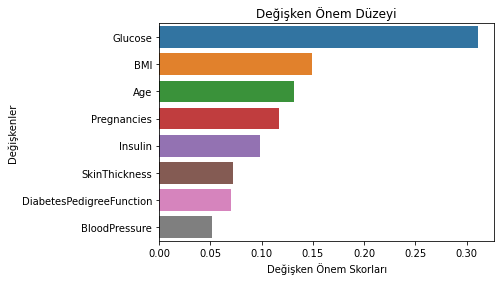

In [47]:
feature_imp=pd.Series(xgb_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyi")
plt.show()